In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import numpy as np
import sys
%matplotlib inline

# Wine info

In [34]:
def assignFlavourProfile(flavourList,flavourProfiles,adjectives):
    profileDict= {}
    #address easy fits and multi-word flavours first
    for n in range(len(flavourList)):
        if flavourProfiles['Varieties'].str.contains(flavourList[n]).any():
            location =  flavourProfiles['Profile'].where(flavourProfiles['Varieties'].str.contains(flavourList[n]))
            profileDict[flavourList[n]] = list(location.dropna())[0]    
    #now we consider the flavours with frivolous adjectives
    for n in range(len(flavourList)):
        if flavourList[n] in profileDict:
            pass
        else:
            flavour = flavourList[n].split(' ')
            if len(flavour)>2:
                user_input = raw_input('What profile should %s belong to? Return x if still cannot be classified, else the profile number'%flavourList[n])
                profile = list(user_input)
            else:
                profile = []
                for f in flavour:
                    if f in adjectives:
                        pass
                    elif flavourProfiles['Varieties'].str.contains(f).any():
                        check = flavourProfiles['Varieties'].where(flavourProfiles['Varieties'].str.contains(f)).dropna()
                        checkList = list(check)[0]
                        if f+' ' in checkList:  #if there is a space after, it implies an adjective
                            adjectives.append(f)
                        else:
                            location =  flavourProfiles['Profile'].where(flavourProfiles['Varieties'].str.contains(f))
                            profile.append(list(location.dropna())[0]) 
                    else:
                        print f, 'does not seem to belong to any profile.'
                        print 'Profiles are\n',flavourProfiles.Profile
                        user_input = raw_input('What profile should %s belong to? Return "a" if this is an adjective, "p" if it cannot be classified, else return the profile number'%f)
                        if user_input == 'a': 
                            adjectives.append(f)
                        elif user_input == 'p': 
                            user_input = raw_input('What profile should %s belong to? Return x if still cannot be classified, else the profile number'%flavourList[n])
                        if user_input != 'a' or 'x':
                            user_input = int(user_input)
                            flavourProfiles.Varieties[user_input]+=','+str(f)
                            profile.append(flavourProfiles.Profile[user_input])
                if len(profile)>1:
                    print 'Flavour is ',flavourList[n],'and chosen profiles are',profile
                    profileChoice = raw_input('What profile should  be chosen? Please choose index or "n" to go back to original list')
                    if profileChoice == 'n':
                        print 'Profiles are\n',flavourProfiles.Profile
                        profileChoice = raw_input('What profile should %s belong to? Return the profile number'%flavourList[n])
                        profile = list(flavourProfiles.Profile[int(profileChoice)])
                    else: 
                        profile = profile[int(profileChoice)]
                    profile = list(profileChoice)
            profileDict[flavourList[n]] = profile[0]
    return profileDict,adjectives

def flavourToProfile(flavour):
    profiles = []
    for flavours in list(flavour):
        profileList = ''
        for i in flavours.split(','):
            profileList+=assignDict[i]+','
        profileList = profileList[:-1]
        profiles.append(profileList)
    return profiles

def colorLegend(colorMap):
    n = len(colorMap.keys())
    ncols = 2
    nrows = n // ncols + 1

    fig, ax = plt.subplots(figsize=(6, 2))

    # Get height and width
    X, Y = fig.get_dpi() * fig.get_size_inches()
    h = Y / (nrows + 1)
    w = X / ncols

    for i, name in enumerate(colorMap.keys()):
        col = i % ncols
        row = i // ncols
        y = Y - (row * h) - h

        xi_line = w * (col + 0.05)
        xf_line = w * (col + 0.25)
        xi_text = w * (col + 0.3)

        ax.text(xi_text, y, name, fontsize=(h * 0.8),
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y + h * 0.1, xi_line, xf_line,
                  color=colorMap.values()[i], linewidth=(h * 0.6))

    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_axis_off()

    fig.subplots_adjust(left=0, right=1,
                        top=1, bottom=0,
                        hspace=0, wspace=0)
    plt.show()

In [35]:
wines = pd.read_csv('wineList.csv')
wines.Flavours = wines.Flavours.str.lower()
wines

,ID,Type,Year,Farm,Flavours,TA (g/litre),PH,ALC%,RS (g/litre),Source
0,Neil Ellis Sauvignon Blanc 2013,Sauvignon Blanc,2013,Groenekloof,"grapefruit,fresh herbs",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
1,Sauvignon Blanc 2013,Sauvignon Blanc,2013,Cape Point Vineyards,"white peach,raw hazelnuts",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
2,Chenin Blanc 2014,Chenin Blanc,2014,MAN Family Wines,"ripe cantaloupe,white peach",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
3,Jackal Bird,Chenin Blanc,2012,Fable Mountain Vineyards,"yellow cherry,marcona almond",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
4,Pinotage 2013,Pinotage,2013,Tormentoso,"red plum,blueberry",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
5,100% Pinotage,Pinotage,2014,Kanonkop,"black cherry,violet,dried tobacco",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
6,Secateurs Bordeaux Blend,Syrah,2012,Badenhorst Family Wines,"strawberry,anise",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
7,The Bernard Series',Syrah,2011,Bellingham,"black cherry,dark chocolate,stony granite",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
8,Chardonnay 2013,Chardonnay,2013,Hamilton Russell winery,"ripe peach,toast,mineral",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...
9,Storm Wines,Pinot Noir,2012,Vrede Vineyard,"strawberry,rose petal,cinnamon",NaN,NaN,NaN,NaN,http://www.seriouseats.com/2015/05/introductio...


In [36]:
flavourProfiles = pd.read_csv('flavourProfiles.csv',skiprows=1,names=['Profile','Varieties'])
flavourProfiles.Varieties = flavourProfiles.Varieties.str.lower()
flavourProfiles

,Profile,Varieties
0,Flower,"iris,peony,elderflower,acacia,lilac,jasmine,ho..."
1,Citrus,"lime,lemon,grapefruit,orange,marmalade,lemons,..."
2,Tree Fruit,"quince,apple,pear,nectarine,peach,apricot,pers..."
3,Tropical Fruit,"pineapple,mango,guava,passion fruit,lychee,bub..."
4,Red Fruit,"cranberry,red plum,pomegranate,sour cherry,str..."
5,Black Fruit,"boysenberry,black currant,black cherry,plum,bl..."
6,Dried Fruit,"raisin,fig,date,fruitcake"
7,Noble Rot,"beeswax,ginger,honey"
8,Spice,"white pepper,red pepper,black pepper,cinnamon,..."
9,Vegetable,"grass,tomato leaf,gooseberry,bell pepper,jalap..."


In [40]:
adjectives = ''
with open('adjectives.txt','r') as f:
    for line in f:
        adjectives+=line
    adjectives = adjectives.split(',')      

uniqueFlavours = [i.split(',') for i in wines.Flavours]
uniqueFlavours = [j for i in uniqueFlavours for j in i]

assignDict,adjectives = assignFlavourProfile(uniqueFlavours,flavourProfiles,adjectives)
print assignDict

with open('adjectives.txt','w') as f:
    for a in adjectives:
        if a == adjectives[-1]:
            f.write(a)
        else:
            f.write(a+',')
flavourProfiles.to_csv('flavourProfiles.csv',columns =['Profile','Varieties'])

Flavour is  cherry  and chosen profiles are ['Red Fruit', 'Flower']
What profile should  be chosen? Please choose index or "n" to go back to original list0
Flavour is  spicy cloves and chosen profiles are ['Spice', 'Spice']
What profile should  be chosen? Please choose index or "n" to go back to original list0
Flavour is  stone fruit and chosen profiles are ['Earth', 'Citrus']
What profile should  be chosen? Please choose index or "n" to go back to original listn
Profiles are
0                             Flower
1                             Citrus
2                         Tree Fruit
3                     Tropical Fruit
4                          Red Fruit
5                        Black Fruit
6                        Dried Fruit
7                          Noble Rot
8                              Spice
9                          Vegetable
10                             Earth
11                         Microbial
12                         Oak Aging
13                     General Aging
1

NameError: name 'assignDict12' is not defined

In [ ]:
wines = wines.assign(Profiles = lambda x: flavourToProfile(x.Flavours))
wines.head()

In [43]:
# def assignProfileToMatrix(profile,pvals):
#     col = []
#     for p in pvals:
# #         print p
#         if profile in str(p).split(','):
#             cols.append
#             return 1
#         else:
#             return 0

wineProfiles = pd.DataFrame(wines.ID)
for u in list(flavourProfiles.Profile):
    wineProfiles[u] = 0

for u in list(flavourProfiles.Profile):
    wineProfiles[u][wines.Profiles.str.contains(u)] = 1

wineProfiles.to_csv('wineProfiles.csv')    
wineProfiles.tail()  


/Users/lauren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lauren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,ID,Flower,Citrus,Tree Fruit,Tropical Fruit,Red Fruit,Black Fruit,Dried Fruit,Noble Rot,Spice,Vegetable,Earth,Microbial,Oak Aging,General Aging,Cork Taint (TCA),Sulfides & Mercaptans,Brettanomyces,Madeirized (or Cooked),Volatile Acidity (Acetic Acid)
27,Saronsburg Viognier,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
28,Tokara Reserve Noble Late Harvest 2009,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
29,Vondeling Chardonnay,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,Viogner,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31,Waterkloof Circumstance Syrah,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
wp = wineProfiles.as_matrix(columns=list(flavourProfiles.Profile))
adjacency = np.dot(wp,wp.T)
print 'Adjacency matrix:',adjacency.shape,'\n',adjacency

weights = []
Source = []
Target = []
for n in range(adjacency.shape[0]):
    for m in range(adjacency.shape[0]):
        if n>=m:
            pass
        else:
            if adjacency[n,m] >0:
                Source.append(wines.ID.values[n])
                Target.append(wines.ID.values[m])
                weights.append(adjacency[n,m])
adj = pd.DataFrame(Source,columns=['Source'])
adj['Target'] = Target
adj['Weight'] = weights
adj['Type'] = 'Undirected'
print adj
adj.to_csv('adjacency.csv')  

Adjacency matrix: (32, 32) 
[[2 0 0 ..., 1 0 0]
 [0 2 1 ..., 1 1 0]
 [0 1 2 ..., 1 1 0]
 ..., 
 [1 1 1 ..., 3 1 1]
 [0 1 1 ..., 1 2 0]
 [0 0 0 ..., 1 0 3]]
                                      Source  \
0            Neil Ellis Sauvignon Blanc 2013   
1            Neil Ellis Sauvignon Blanc 2013   
2            Neil Ellis Sauvignon Blanc 2013   
3            Neil Ellis Sauvignon Blanc 2013   
4            Neil Ellis Sauvignon Blanc 2013   
5            Neil Ellis Sauvignon Blanc 2013   
6            Neil Ellis Sauvignon Blanc 2013   
7            Neil Ellis Sauvignon Blanc 2013   
8            Neil Ellis Sauvignon Blanc 2013   
9            Neil Ellis Sauvignon Blanc 2013   
10           Neil Ellis Sauvignon Blanc 2013   
11           Neil Ellis Sauvignon Blanc 2013   
12           Neil Ellis Sauvignon Blanc 2013   
13                      Sauvignon Blanc 2013   
14                      Sauvignon Blanc 2013   
15                      Sauvignon Blanc 2013   
16                      Sauv

True

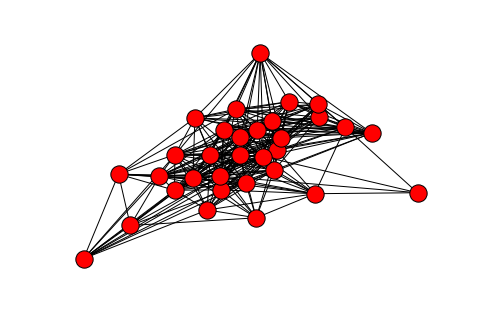

In [51]:
G=nx.from_numpy_matrix(adjacency,create_using = nx.MultiGraph())
nx.draw(G)
nx.is_connected(G)

# More plots and analysis

In [52]:
import seaborn as sns

sns.set_palette('Dark2')
plt.rcParams['figure.figsize'] = (8,6)

In [54]:
wines.columns

Index([u'ID', u'Type', u'Year', u'Farm', u'Flavours', u'TA (g/litre)', u'PH',
       u'ALC%', u'RS (g/litre)', u'Source', u'Profiles'],
      dtype='object')

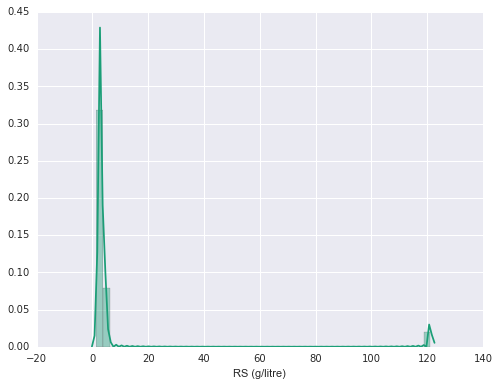

In [63]:
sns.distplot(wines['RS (g/litre)'].dropna())

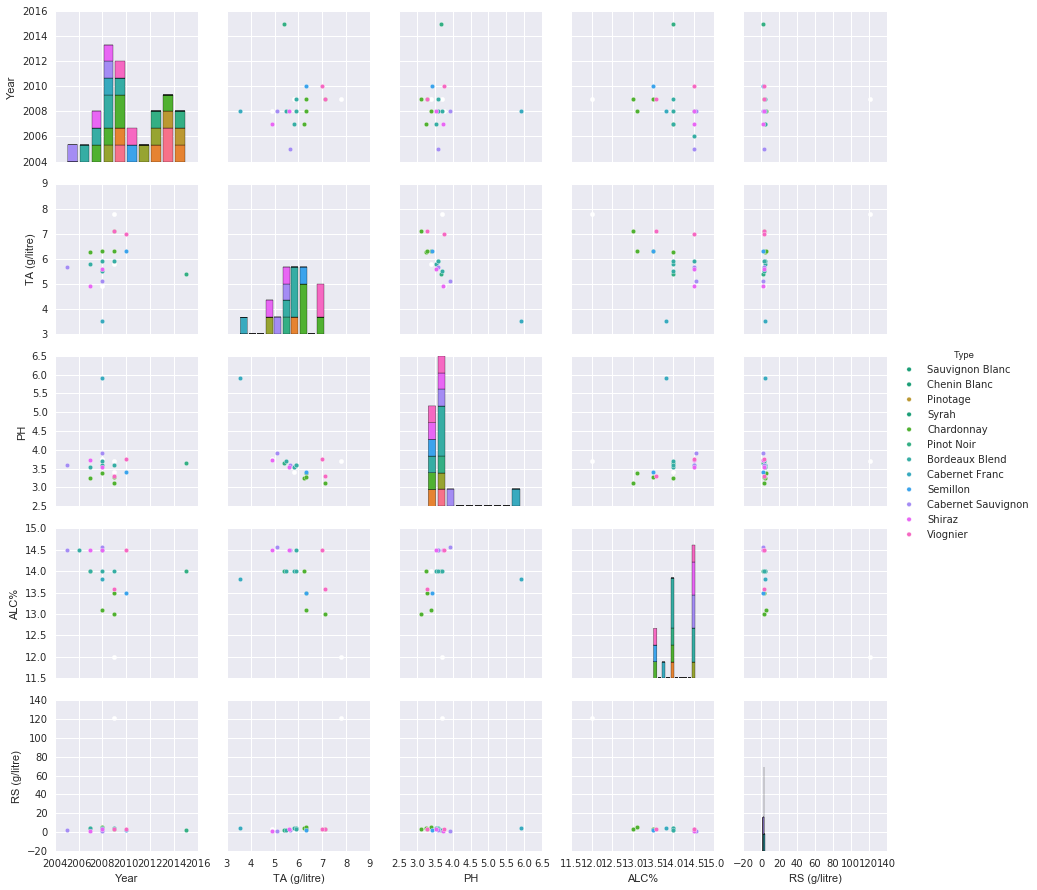

In [64]:
sns.pairplot(data=wines, hue='Type')

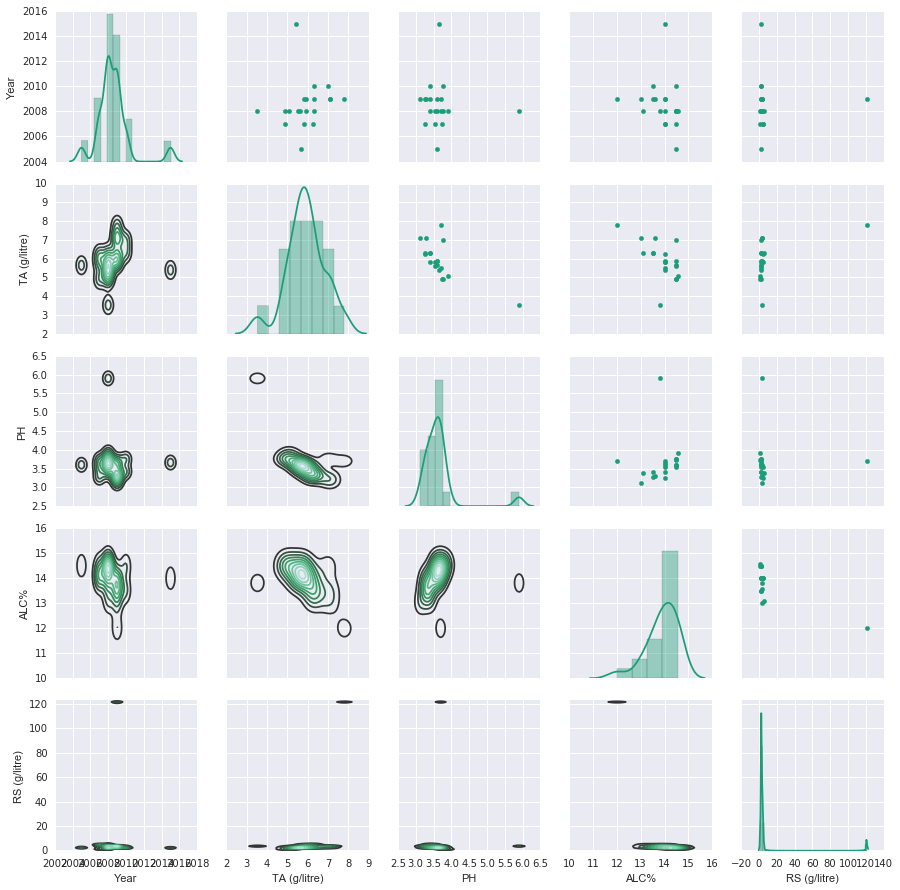

In [67]:
g = sns.PairGrid(wines.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)

/Users/lauren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x124a3cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x12507f410>,
 'fliers': [<matplotlib.lines.Line2D at 0x124a29cd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x124a329d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x124a3c190>,
  <matplotlib.lines.Line2D at 0x124884210>]}

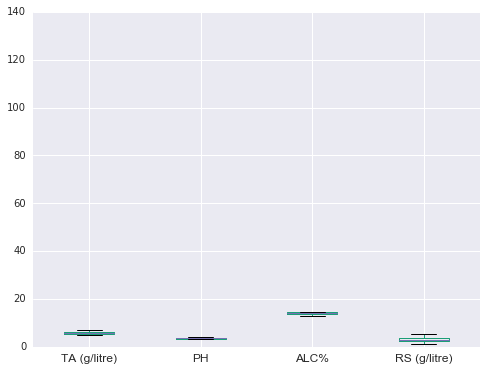

In [71]:
wines.boxplot(column=['TA (g/litre)', 'PH','ALC%', 'RS (g/litre)'])

In [ ]:
import nltk.data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
